Standard PCA will not work well with linearly inseparable data in which the different classes cannot be clearly separated by drawing a straight line or a hyperplane, but can only be separated by using a curved decision boundary.

For nonlinear dimensionality reduction, we can use the kernel PCA which is the non-linear form of the standard PCA.

# Kernels and kernel trick

The kernel trick is the process of transforming linearly inseparable data into a higher dimension where data is linearly separable. This is achieved by using kernels. A kernel is a function that transforms data.

# Important hyperparameters in `KenelPCA()`

- `n_components`: The number of components that we want to keep. All components are kept when `n_components=None`(default). 
- `kernel`: The type of kernel to be used for PCA. There are 4 types of kernels used in the KernelPCA() class: ‘linear’, ‘poly’, ‘rbf’ and ‘sigmoid’. The standard (linear) PCA will be applied when the kernel is ‘linear’. Non-linear PCA can be performed by using one of the other kernels. ‘rbf’ (radial basis function) is the most common one. The default is the ‘linear’ kernel.
- `gamma`: This is known as the kernel coefficient for ‘poly’, ‘rbf’ and ‘sigmoid’ kernels. A float value can be used for gamma. The default is None, which uses the value calculated by (1/number of features). 

# Examples of applying PCA and kernel PCA

### Generating non-linear data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

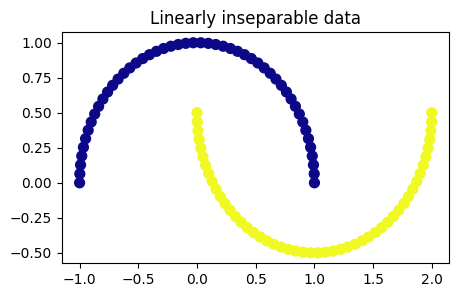

In [2]:
plt.figure(figsize=[5, 3])
X, y = make_moons(n_samples=100, noise=None, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="plasma")
plt.title("Linearly inseparable data")
plt.show();

### Applying linear PCA to linearly inseparable data

In [3]:
import numpy as np
from sklearn.decomposition import PCA

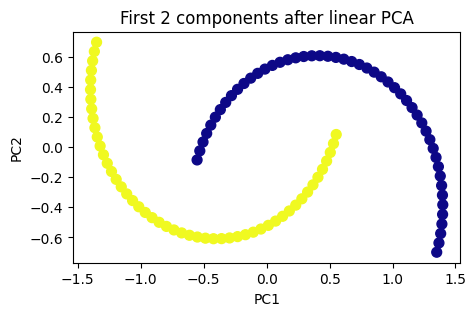

In [4]:
# Example 1: Applying linear PCA by keeping 2 components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=[5, 3])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap="plasma")
plt.title("First 2 components after linear PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show();

After applying linear PCA to the 2-dimensional non-linear moons data by keeping two components, the dimensionality of data has not been reduced and the classes are still not linearly separable.

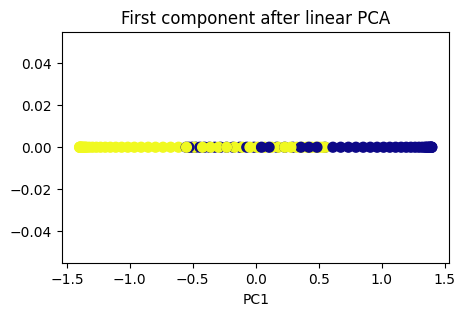

In [5]:
# Applying linear PCA by keeping only one component

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize=[5, 3])
plt.scatter(X_pca[:, 0], np.zeros((100, 1)), c=y, s=50, cmap="plasma")
plt.title("First component after linear PCA")
plt.xlabel("PC1")
plt.show();

After applying linear PCA to the 2-dimensional non-linear moons data by keeping one component, the dimensionality of data has been reduced by half, but the classes are still not linearly separable.

### Applying kernel PCA to linearly inseparable data

In [6]:
from sklearn.decomposition import KernelPCA

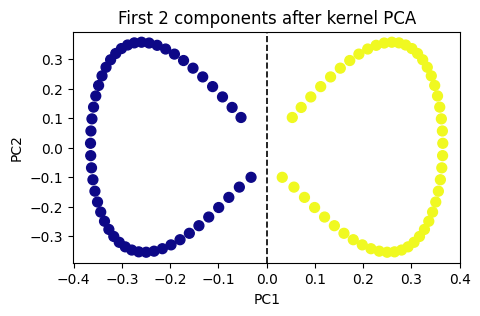

In [7]:
# Example 3: Applying kernel PCA by keeping 2 components

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=[5, 3])
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=50, cmap="plasma")
plt.title("First 2 components after kernel PCA")
plt.axvline(x=0.0, linestyle="dashed", color="black", linewidth=1.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show();

After applying kernel PCA to the 2-dimensional non-linear moons data by keeping two components, the dimensionality of data has not been reduced*, but the classes are now linearly separable!

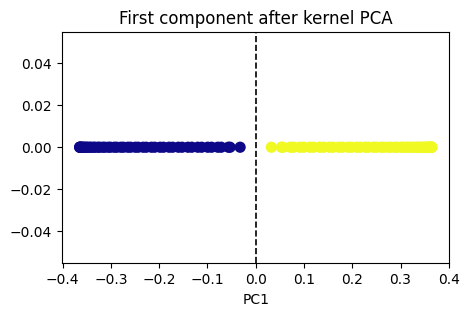

In [8]:
# Example 4: Applying kernel PCA by keeping only one component

kpca = KernelPCA(n_components=1, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=[5, 3])
plt.scatter(X_kpca[:, 0], np.zeros((100, 1)), c=y, s=50, cmap="plasma")
plt.axvline(x=0.0, linestyle="dashed", color="black", linewidth=1.2)
plt.title("First component after kernel PCA")
plt.xlabel("PC1")
plt.show();

After applying kernel PCA to the 2-dimensional non-linear moons data by keeping one component, the dimensionality of data has been reduced, and also the classes are now linearly separable!

# Limitations of using kernel PCA

- The value of `gamma` for the ‘rbf’, ‘poly’ and ‘sigmoid’ kernels should be specified by the user as a hyperparameter. It requires implementing a hyperparameter tuning technique such as Random Search or Grid Search.
- Unlike in PCA, the `n_component` hyperparameter does not accept a float value. So, we cannot select the best number of components by specifying the amount of variance that needs to be explained by the principal components.